In [1]:
import numpy as np
import sys
import time
import os
import h5py
import os.path as op
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import array
%matplotlib inline
sys.path.append('..')
from zwatershed import *
from visualization.visualize_funcs import *
from edgelist_methods import *
from run_tests import *
path_to_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/'
path_to_data = path_to_folder + 'data/'

# -------------------------------- parameters ---------------------------------------
path_to_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/'
path_to_data = path_to_folder + 'data/'
global segs_old, segs_new, rand_old, rand_new
segs_old, segs_new, rand_old, rand_new = [[]], [[]], -1, -1
threshes = [10, 2000]
hdf5_gt_file = path_to_data + 'groundtruth_seg_thick.h5'  # /groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
hdf5_pred_file = path_to_data + 'tstvol-1_2.h5'  # /tier2/turaga/singhc/train/output_200000/tstvol-1_2.h5'
seg_save_path = path_to_data + 'out/'  # '/groups/turaga/home/singhc/evaluation/out/'
seg_save_path_arb = path_to_data + 'out_arb/'  # '/groups/turaga/home/singhc/evaluation/out/'
save_threshes = threshes
p1, p2, p3 = 160, 170, 180  # 215, 214, 214 # 200, 200, 200
# ----------------------------- load/shape data ------------------------------------
hdf5_gt = h5py.File(hdf5_gt_file, 'r')
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]], dtype='uint32')
aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]], dtype='float32')
aff = aff[:, p1:(-1 * p1), p2:(-1 * p2), p3:(-1 * p3)]
gt = trim_arbitrary_aff(gt, aff)
nhood = mknhood3d(1)
node1, node2, edge_affs = affgraph_to_edgelist(aff, nhood)

In [6]:
segs_old, rand_old, segs_new, rand_new = test_eval()
# segs_old, rand_old = test_no_eval()
print_final()


original watershed...
time:  0.859281

new watershed...
time:  3.939129 

--------Final--------
{'V_Rand_merge': [0.9952430499257651, 0.9951863471272734], 'V_Rand_split': [0.5609951168253093, 0.7557551807731029], 'V_Rand': 0.85910034766037}
{'V_Rand_merge': [0.9952425805630566, 0.9951858437107787], 'V_Rand_split': [0.5610207139667234, 0.7557551805570292], 'V_Rand': 0.859100159945081}
nsegs 7797 413
nsegs 7797 413


In [7]:
## Open training data and labels
data_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/data/'# 'nobackup/turaga/data/FlyEM/fibsem_medulla_7col/tstvol-520-1/'
os.chdir('/.')
f = h5py.File(data_folder + 'im_uint8.h5', 'r')
im = f[f.keys()[0]] # was 'main'
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g[g.keys()[0]],dtype='float32') #3,z,y,x - was 'main'
label_set = np.transpose(label_set,(1,2,3,0))

(520, 520, 520) (520, 520, 520, 3) (112, 92, 72)
(112, 92, 72) (112, 92, 72, 3) (112, 92, 72)
old num 413 new num 413


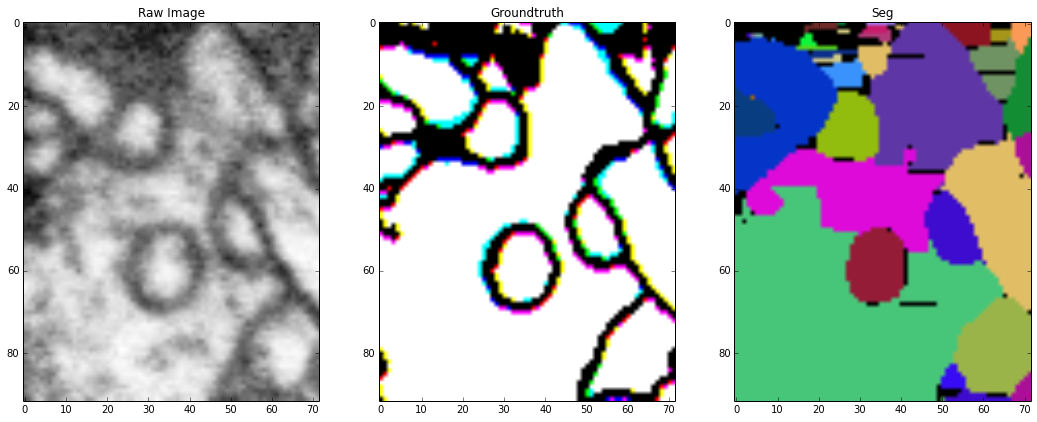

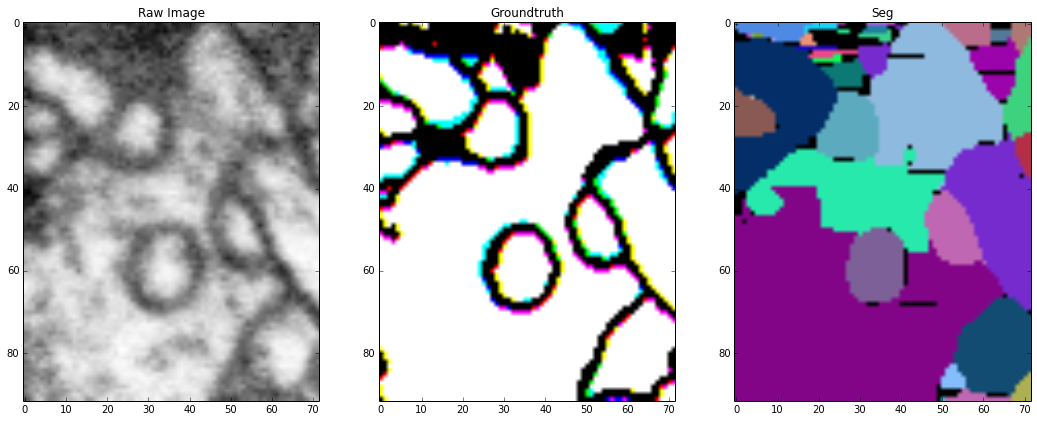

In [8]:
# view segs
num_to_view = 1
seg_old = segs_old[1]#seg_one
seg_new = segs_new[1]
print im.shape,label_set.shape,seg_new.shape
im,label_set=trim_arbitrary(im,label_set,seg_new) 
print im.shape,label_set.shape,seg_new.shape
print "old num",len(np.unique(seg_old)),"new num",len(np.unique(seg_new))
display_arbitrary_seg(im, label_set, seg_old)
display_arbitrary_seg(im, label_set, seg_new)

In [5]:
print segs_old

 [[]]
